In [125]:
# Adicionar código do país desejado abaixo!!! (COM 3 LETRAS)
cod_pais = "USA"

In [126]:
import requests
import pandas as pd

import seaborn as sns
sns.set(style="darkgrid")

In [127]:
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

In [128]:
# Realiza requisição do dado
r = requests.get("https://gdpflask.herokuapp.com/?codigo_pais="+cod_pais)
r_json = r.json()

# Transforma JSON em um dataframe
df = pd.json_normalize(r_json)

# Tranpõe dados das colunas para linhas
df = df.melt(id_vars = ['nome_pais','codigo_pais', 'regiao', 'faixa_renda', 'Indicador' ], var_name = 'Ano', value_name = 'GDP')

# Converte GDP de texto para numérico
df['GDP'] = df['GDP'].str.replace(',', '.').astype(float)

print(df.head(5))

       nome_pais codigo_pais         regiao  faixa_renda  \
0  United States         USA  North America  High income   
1  United States         USA  North America  High income   
2  United States         USA  North America  High income   
3  United States         USA  North America  High income   
4  United States         USA  North America  High income   

                      Indicador   Ano          GDP  
0  GDP per capita (current US$)  1960  3007.123445  
1  GDP per capita (current US$)  1961  3066.562869  
2  GDP per capita (current US$)  1962  3243.843078  
3  GDP per capita (current US$)  1963  3374.515171  
4  GDP per capita (current US$)  1964  3573.941185  


<ipython-input-129-542cb9f0b52b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(),


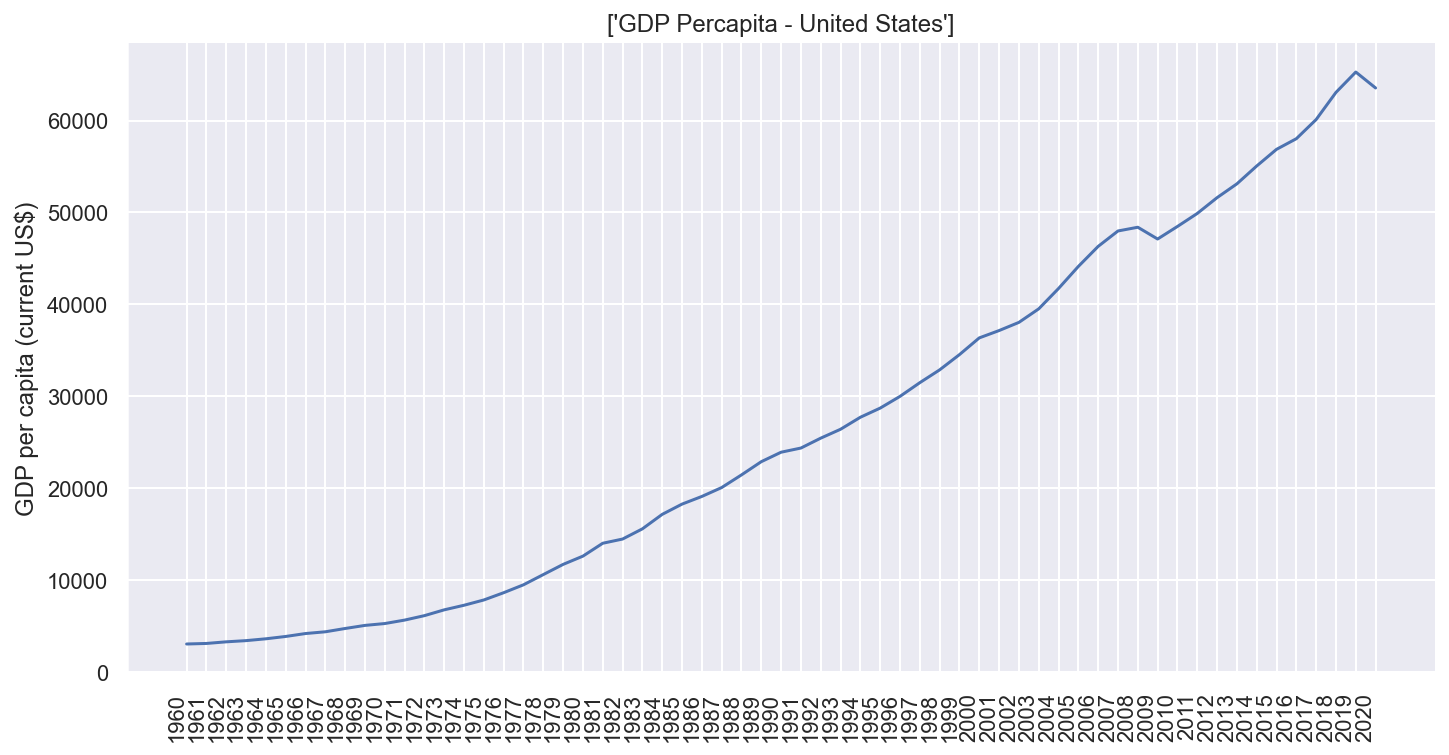

In [129]:
ax = sns.relplot(
    data=df, 
    x="Ano", y="GDP", 
    kind="line",
    height=5, aspect=2 
).set(
    title=("GDP Percapita - " + df['nome_pais'].unique() ), 
    ylabel="GDP per capita (current US$)",
    xlabel=None
)

for axes in ax.axes.flat:
   axes.set_xticklabels(axes.get_xticklabels(),
      rotation = 90,
      horizontalalignment = 'right')